量子AI入門（１．３．７）　1量子ビット回路

**1量子ビットの量子コンピューティング**

-from qiskit import QuantumCircuit\
量子回路を構築するためのクラス。\
このクラスを使って量子ビット（量子ビットの状態）や古典ビット（測定結果を記録するビット）を操作します。

-from qiskit_aer import StatevectorSimulator, AerSimulator\
●StatevectorSimulator:\
　✓量子状態ベクトルを計算するシミュレーター。\
　✓量子回路の状態を正確に追跡し、量子ビットの状態ベクトルを返します。\
●AerSimulator:\
　✓実行可能な量子回路をシミュレートする一般的なシミュレーター。\
　✓実機のノイズを再現する設定も可能で、実行結果（測定結果など）を取得できます。

-from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager\
量子回路を実行する際に対象デバイス（またはシミュレーター）に適合させるために回路を最適化する「パスマネージャ」を生成します。\
トランスパイル（変換）とは、例えば以下を含みます：\
・論理的な量子ゲートを物理的なゲートに置き換える。\
・実機に依存する制約（接続性やノイズモデル）を考慮する。\
・実行時間を短縮するように回路を再構成する。

-from qiskit_ibm_runtime import SamplerV2 as Sampler\
"SamplerV2"は量子回路をIBMの量子コンピュータやシミュレーターで実行し測定結果をサンプリングする機能を提供\します。
主に次のような場面で利用します：\
・実機やシミュレーターでの計算結果を取得する。\
・測定の確率分布や期待値を計算する。

-from qiskit.visualization import plot_bloch_multivector\
"qiskit.visualization"は量子回路や測定結果、量子状態などを可視化します。\
●plot_bloch_multivector\
量子状態をブロッホ球（Bloch Sphere）に可視化するための関数です。この関数は通常、シミュレーターで量子状態ベクトルを取得した後に使用します。

【Qiskitライブラリのインポート】

In [2]:
# Import the qiskit library
#量子ビット
from qiskit import QuantumCircuit

#シミュレータ
from qiskit_aer import StatevectorSimulator

#ブロッホ球表示
from qiskit.visualization import plot_bloch_multivector

#シミュレータとパスマネージャとサンプラとグラフ化
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

**例題１　Xゲートを施す**

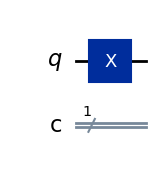

In [5]:
#例題１　Xゲートを施す
#量子ビットと古典ビットをそれぞれ1つずつ用意
circuit = QuantumCircuit(1,1) #1量子ビットと１古典ビットを準備

#★☆★ Xゲート ☆★☆
circuit.x(0)

#量子回路を表示
circuit.draw(output="mpl")

In [71]:
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

#結果の表示
print(result)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


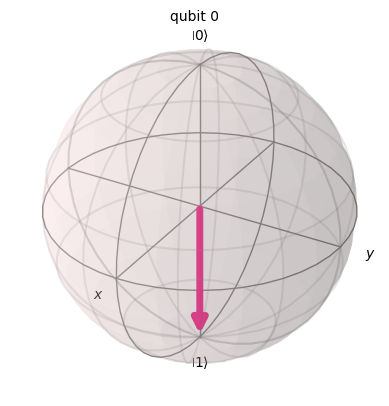

In [72]:
#ブロッホ球の表示
plot_bloch_multivector(result)

 > Counts: {'1': 1024}


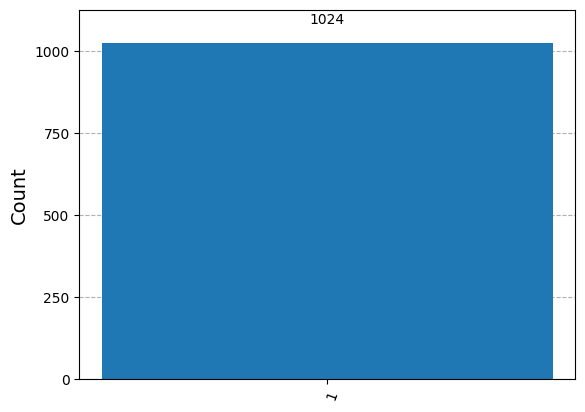

In [73]:
#量子ビット0の測定結果を古典ビット0に記録
circuit.measure(0,0) 

#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**例題２　Zゲートを施す**

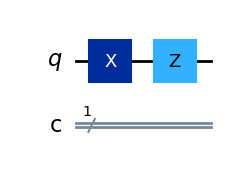

In [74]:
#例題２ Zゲートを施す
#量子ビットと古典ビットをそれぞれ1つずつ用意
circuit_0 = QuantumCircuit(1,1) #|0〉
circuit_1 = QuantumCircuit(1,1) #|1〉

#★☆★ Zゲート ☆★☆
circuit_0.z(0) #|0〉
circuit_1.x(0) #|1〉
circuit_1.z(0) #|1〉

#量子回路を表示
circuit_0.draw(output="mpl")
circuit_1.draw(output="mpl")

Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


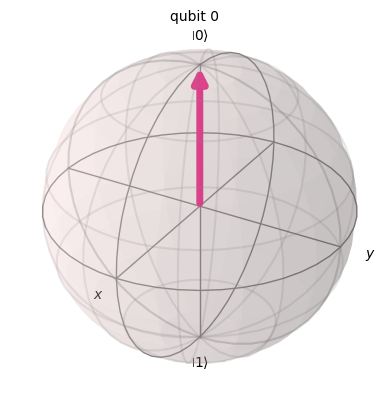

In [75]:
#|0〉
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit_0).result().get_statevector(circuit_0, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


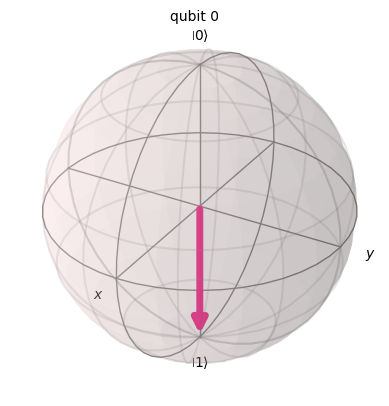

In [76]:
#|1〉
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit_1).result().get_statevector(circuit_1, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

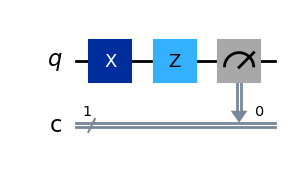

In [77]:
#量子ビット0の測定結果を古典ビット0に記録
circuit_0.measure(0,0)
circuit_1.measure(0,0)

#量子回路を表示
circuit_1.draw(output="mpl")

 > Counts: {'1': 1024}


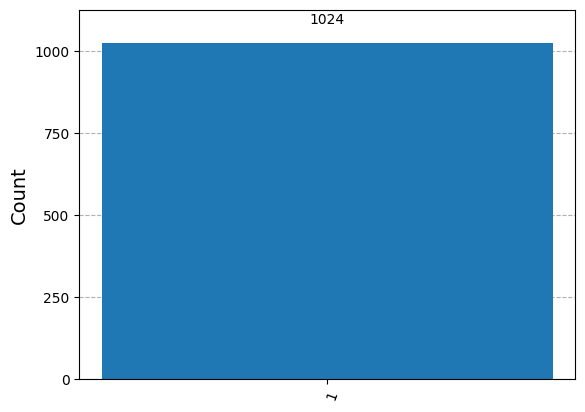

In [79]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit_1)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**例題３　Hゲートを施す**

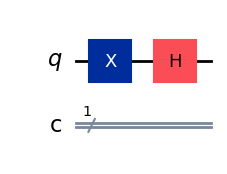

In [86]:
#例題３ Hゲートを施す
#量子ビットと古典ビットをそれぞれ1つずつ用意
circuit_0 = QuantumCircuit(1,1) #|0〉
circuit_1 = QuantumCircuit(1,1) #|1〉

#★☆★ Hゲート ☆★☆
circuit_0.h(0) #|0〉
circuit_1.x(0) #|1〉
circuit_1.h(0) #|1〉

#量子回路を表示
circuit_0.draw(output="mpl")
circuit_1.draw(output="mpl")

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


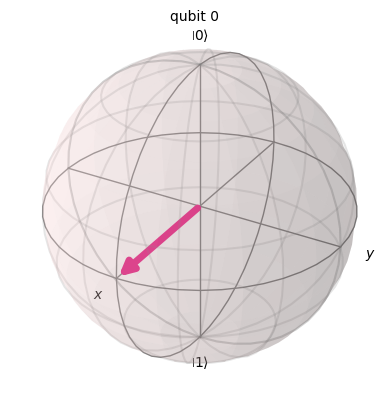

In [87]:
#|0〉
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit_0).result().get_statevector(circuit_0, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


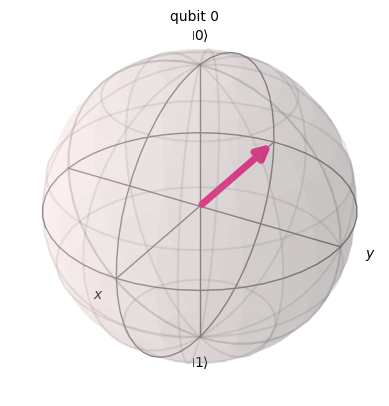

In [88]:
#|1〉
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit_1).result().get_statevector(circuit_1, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

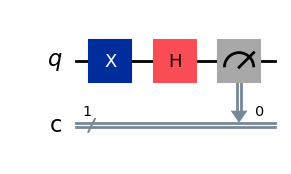

In [89]:
#量子ビット0の測定結果を古典ビット0に記録
circuit_1.measure(0,0)

#量子回路を表示
circuit_1.draw(output="mpl")

 > Counts: {'0': 521, '1': 503}


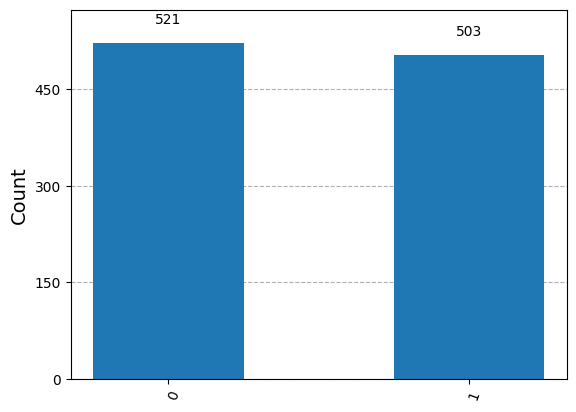

In [90]:
#量子ビット0の測定結果を古典ビット0に記録
circuit_0.measure(0,0)
circuit_1.measure(0,0)

#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit_1)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

※本1.3.7章でなぜX→Z→HのZが必要なのか理解できていない。